# **Market Segmentation of Electronic Vehicles in India**


---



## Sourabh Feynn Labs

In [1]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# **Fetching Datasets**

In [43]:
# fetching dataset - 1
# Fuel type
df1 = pd.read_csv('G:\Feynn labs\P2\P2 Ev market/ElectricCarData_Norm.csv')
df1

<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Bhanu\AppData\Local\Temp\ipykernel_5408\696297992.py:3: SyntaxWarning: invalid escape sequence '\F'
  df1 = pd.read_csv('G:\Feynn labs\P2\P2 Ev market/ElectricCarData_Norm.csv')


,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [10]:
# fetching dataset - 2
df2 = pd.read_csv('G:\Feynn labs\P2\P2 Ev market/IEA-EV-dataEV_salesHistoricalCars.csv')
df2

<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Bhanu\AppData\Local\Temp\ipykernel_5408\1765592151.py:2: SyntaxWarning: invalid escape sequence '\F'
  df2 = pd.read_csv('G:\Feynn labs\P2\P2 Ev market/IEA-EV-dataEV_salesHistoricalCars.csv')


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,4.600000e-04
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,1.700000e+02
...,...,...,...,...,...,...,...,...
2771,World,Historical,Oil displacement Mbd,Cars,EV,2022,Milion barrels per day,4.300000e-01
2772,World,Historical,"Oil displacement, million lge",Cars,EV,2022,"Oil displacement, million lge",2.500000e+04
2773,World,Historical,EV sales,Cars,BEV,2022,Vehicles,7.300000e+06
2774,World,Historical,EV sales share,Cars,EV,2022,percent,1.400000e+01


# **Performing Exploratory Data Analysis(EDA)**

# *Data Description and analysis for both datasets*

In [44]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (103, 14)
DF2 Shape:  (2776, 8)


In [45]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 >>> ')
print(df1.info())
print('\n <<< DATASET 2 >>>')
print(df2.info())

 <<< DATASET 1 >>> 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB
None

 <<< DATASET 2 >>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dty

In [46]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


'<<< DATASET 2 >>>'

,year,value
count,2776.000000,2.776000e+03
mean,2016.438401,9.015623e+04
std,3.583217,6.186595e+05
min,2010.000000,1.600000e-05
25%,2013.000000,9.100000e-01
50%,2017.000000,4.000000e+02
75%,2020.000000,1.000000e+04
max,2022.000000,1.800000e+07


# **DATASET 1 EDA**

In [47]:
df1.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [48]:
# Setting visual style
sns.set(style='whitegrid')

# 1. Seats Type Distribution
fuel_counts = df1['Seats'].value_counts()

# 2. PowerTrain Type Distribution
transmission_counts = df1['PowerTrain'].value_counts()

# 3. BodyStyle Type Distribution
seller_counts = df1['BodyStyle'].value_counts()

# 4. Segment Distribution
owner_counts = df1['Segment'].value_counts()

# 5. PlugType Distribution
year_counts = df1['PlugType'].value_counts().sort_index()

In [49]:
# 6. Correlation Heatmap
# Select only numeric columns before computing correlation
numeric_cols = df1.select_dtypes(include=['number'])

# Now safely calculate correlation
correlation = numeric_cols.corr()

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_5408\3639818370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seats', data=df1, palette='Set3')


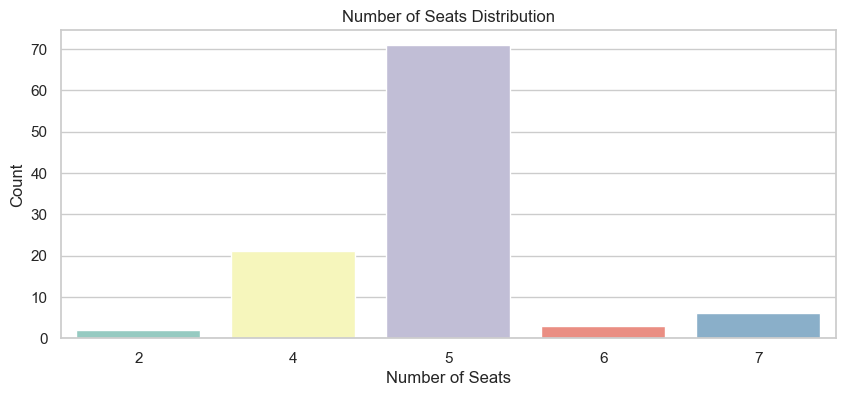

In [65]:
# Transmission Type
plt.figure(figsize=(10, 4))
sns.countplot(x='Seats', data=df1, palette='Set3')
plt.title('Number of Seats Distribution')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.show()

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_5408\1427739853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PowerTrain', data=df1, palette='cool')


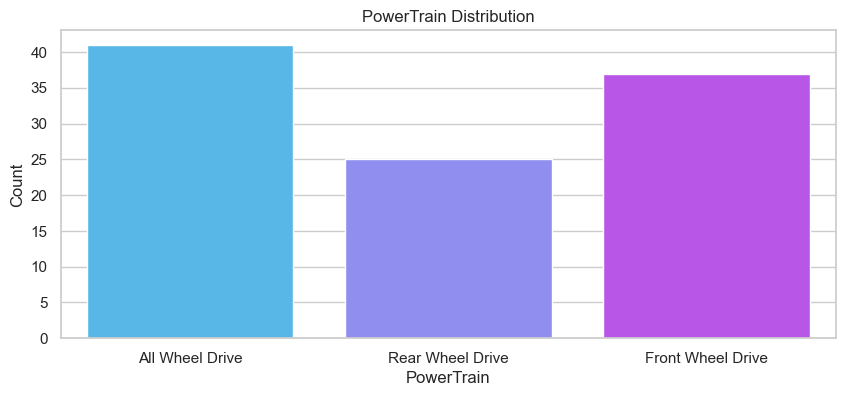

In [64]:
# Seller Type
plt.figure(figsize=(10, 4))
sns.countplot(x='PowerTrain', data=df1, palette='cool')
plt.title('PowerTrain Distribution')
plt.xlabel('PowerTrain')
plt.ylabel('Count')
plt.show()

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_5408\676691801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BodyStyle', data=df1, palette='autumn')


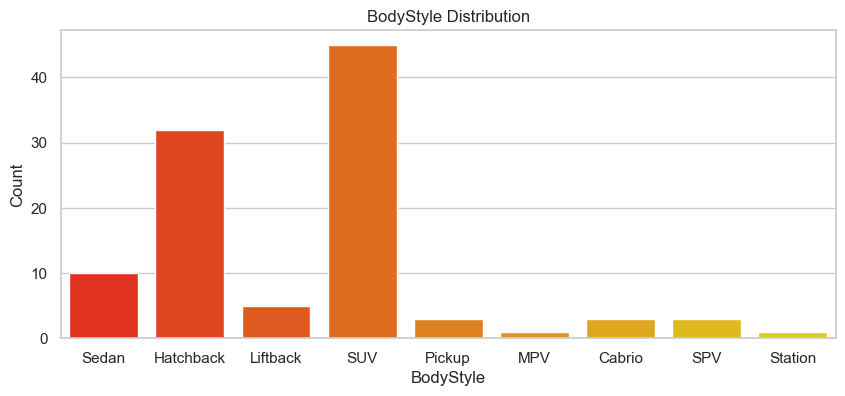

In [63]:
# Owner Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='BodyStyle', data=df1, palette='autumn')
plt.title('BodyStyle Distribution')
plt.xlabel('BodyStyle')
plt.ylabel('Count')
plt.show()

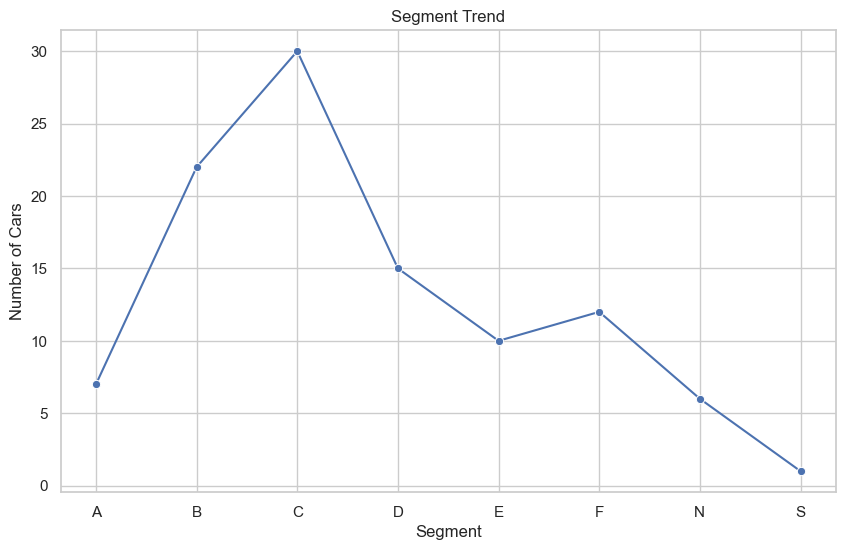

In [62]:
# Plotting
Segment_counts = df1['Segment'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=Segment_counts.index, y=Segment_counts.values, marker='o')
plt.title('Segment Trend')
plt.xlabel('Segment')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_5408\1682605677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PlugType', data=df1, palette='autumn')


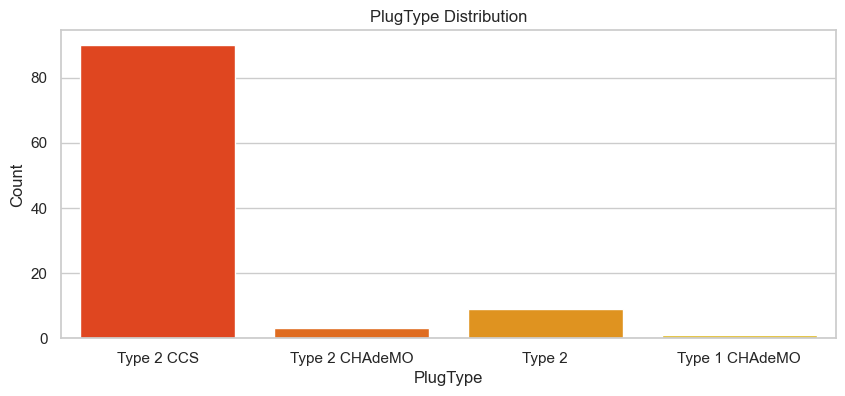

In [61]:
# Owner Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='PlugType', data=df1, palette='autumn')
plt.title('PlugType Distribution')
plt.xlabel('PlugType')
plt.ylabel('Count')
plt.show()

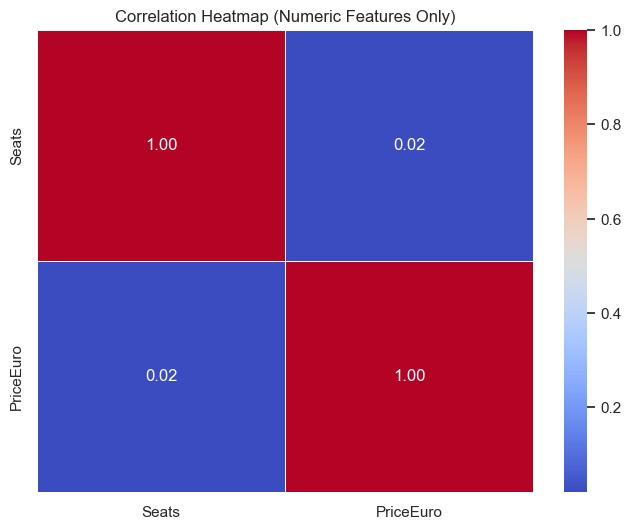

In [67]:
# Plotting
numeric_cols = df1.select_dtypes(include=['number'])
correlation = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

# **DATASET 2 EDA**

In [68]:
# Display basic information about the dataset
df_info = df2.info()
df_head = df2.head()
df_description = df2.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      2776 non-null   object 
 1   category    2776 non-null   object 
 2   parameter   2776 non-null   object 
 3   mode        2776 non-null   object 
 4   powertrain  2776 non-null   object 
 5   year        2776 non-null   int64  
 6   unit        2776 non-null   object 
 7   value       2776 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 173.6+ KB


In [69]:
df_info, df_head, df_description

(None,
       region    category       parameter  mode powertrain  year      unit  \
 0  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
 1  Australia  Historical  EV stock share  Cars         EV  2011   percent   
 2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
 3  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
 4  Australia  Historical        EV sales  Cars        BEV  2012  Vehicles   
 
        value  
 0   49.00000  
 1    0.00046  
 2    0.00650  
 3   49.00000  
 4  170.00000  ,
        region    category parameter  mode powertrain         year      unit  \
 count    2776        2776      2776  2776       2776  2776.000000      2776   
 unique     36           1         7     1          3          NaN         5   
 top     World  Historical  EV sales  Cars         EV          NaN  Vehicles   
 freq      117        2776       834  2776       1112          NaN      1664   
 mean      NaN         NaN

In [70]:
df2.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [71]:
# Setting visual style
sns.set(style='whitegrid')

# 1. parameter Distribution
Gender_counts = df2['parameter'].value_counts()

# 2. powertrain Distribution
Commute_counts = df2['powertrain'].value_counts()

# 3. year Distribution
Base_body_size_counts = df2['year'].value_counts()

# 6. Correlation Heatmap
# Select only numeric columns before computing correlation
numeric_cols = df2.select_dtypes(include=['number'])

# Now safely calculate correlation
correlation = numeric_cols.corr()

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_5408\2404816021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='parameter', data=df2, palette='Set2')


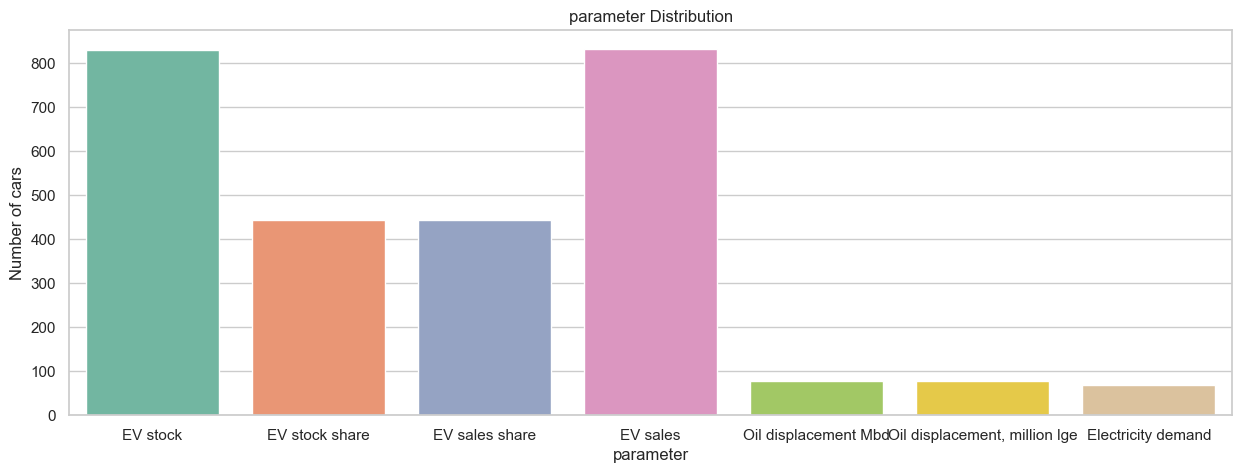

In [75]:
# Fuel Type
plt.figure(figsize=(15, 5))
sns.countplot(x='parameter', data=df2, palette='Set2')
plt.title('parameter Distribution')
plt.xlabel('parameter')
plt.ylabel('Number of cars')
plt.show()

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_5408\2725367148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='powertrain', data=df2, palette='Set2')


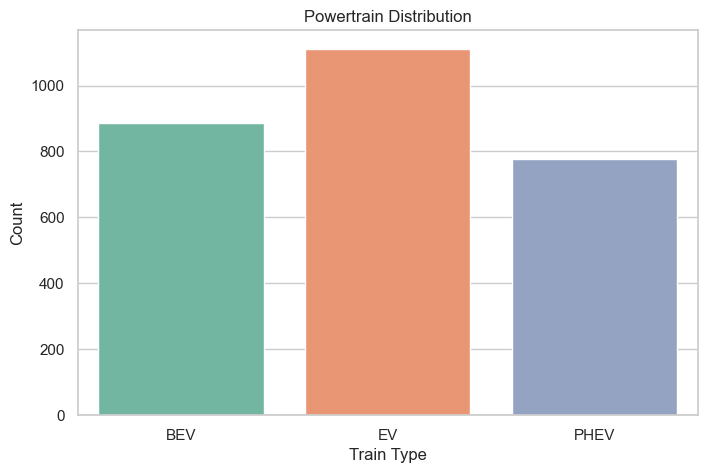

In [76]:
# Commute Type
plt.figure(figsize=(8, 5))
sns.countplot(x='powertrain', data=df2, palette='Set2')
plt.title('Powertrain Distribution')
plt.xlabel('Train Type')
plt.ylabel('Count')
plt.show()

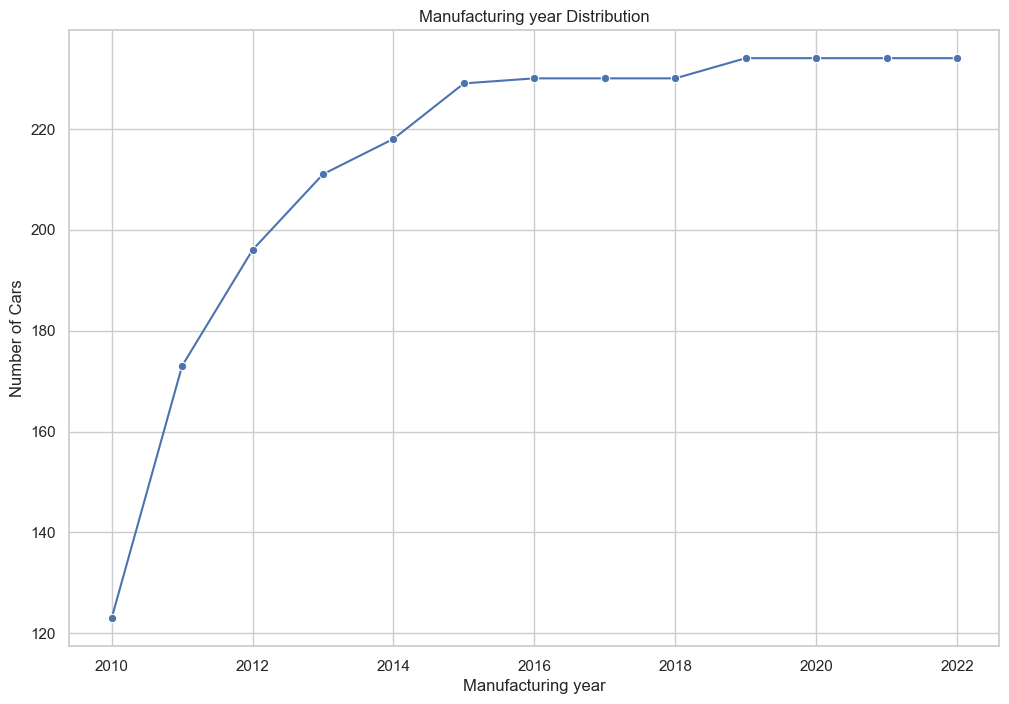

In [78]:
# Base body size
year_counts = df2['year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Manufacturing year Distribution')
plt.xlabel('Manufacturing year')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

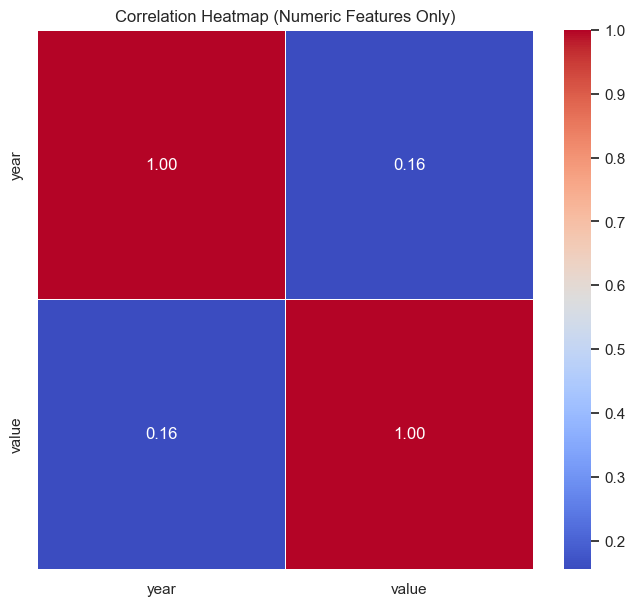

In [80]:
numeric_cols = df2.select_dtypes(include=['number'])
correlation = numeric_cols.corr()

plt.figure(figsize=(8,7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()